# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, 29.05.2020 Cuma gece yarısına kadar EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine pandas kütüphanesinin kullanılması gerekmektedir.

### Soru 1:
* Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren ```"survey_results_public.csv"``` adlı dosyayı okuyarak __survey_19__ adlı DataFrame'e aktarın.
* DataFrame'in satır ve sütun sayısını yazdırın.
* ```Respondent``` sütununu index olarak atayın.
* Aşağıdaki sütunları dataframe'den siliniz:

    ``` ['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']``` 
  
  
* ```DevType``` ya da ```LanguageWorkedWith``` sütununda eksik veri olan satırları siliniz. Kaç satır silindi?
* ```Country``` sütunundaki ```Russian Federation``` ve ```Czech Republic``` değerlerini sırasıyla ```Russia``` ve ```Czechia``` olarak değiştiriniz.
* Haftalık çalışma saati ```(WorkWeekHrs)``` ya da yıllık maaş ```(ConvertedComp)``` sütunlarındaki değerleri, ilgili sütunun ortalamasının %99'undan daha uzakta veri içeren satırları siliniz.
* ```Gender``` sütununda ```Man```, ```Woman``` ve ```NaN``` dışındaki değerleri, ```Non-binary``` değeri ile değiştirin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
survey_19 = pd.read_csv('survey_results_public.csv')

In [4]:
print("survey_19'in satır sayısı: ",survey_19.shape[0])
print("survey_19'in sütun sayısı: ",survey_19.shape[1])

survey_19'in satır sayısı:  88883
survey_19'in sütun sayısı:  85


In [4]:
survey_19.set_index('Respondent', inplace = True)

In [5]:
silinecek_kolonlar=['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']
survey_19.drop(silinecek_kolonlar, axis = 1, inplace = True)

In [6]:
before=survey_19.shape[0]
print("Silme işleminden önce satır sayısı: ",before)
survey_19.dropna(subset=['DevType','LanguageWorkedWith'],inplace=True)
after=survey_19.shape[0]
print("Silme işleminden sonra satır sayısı: ",after)
print("Silinen satır sayısı: ",before-after)



Silme işleminden önce satır sayısı:  88883
Silme işleminden sonra satır sayısı:  80532
Silinen satır sayısı:  8351


In [7]:
survey_19.loc[survey_19.Country=='Russian Federation','Country']='Russia'
survey_19.loc[survey_19.Country=='Czech Republic','Country']='Czechia'

In [8]:
survey_19.shape[0]
ort_hrs=survey_19['WorkWeekHrs'].mean()
ort_comp=survey_19['ConvertedComp'].mean()
survey_19.drop(survey_19[(survey_19.WorkWeekHrs>(ort_hrs*199/100)) | (survey_19.WorkWeekHrs<(ort_hrs*1/100)) | (survey_19.ConvertedComp<(ort_comp*1/100)) | (survey_19.ConvertedComp>(ort_comp*199/100))].index,axis=0,inplace=True)

In [14]:
survey_19.loc[~((survey_19['Gender']=='Man') | (survey_19['Gender']=='Woman') | (survey_19['Gender'].isnull())),'Gender']='Non-binary'
survey_19['Gender'].value_counts()

Man           66740
Woman          5418
Non-binary      902
Name: Gender, dtype: int64

### Soru 2:
* ```Age``` sütununu 0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99 binleri ile aralığa çevirerek ```AgeInterval``` adında yeni bir sütun oluşturunuz.
* Ankete katılanların yaş aralıklarına göre dağılımını pasta grafiğinde gösteriniz. 
* (19-24] yaş aralığının en çok kullandığı sosyal medya nedir?

In [15]:
intervals=[0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99]
survey_19['AgeInterval'] = pd.cut(survey_19['Age'],intervals)

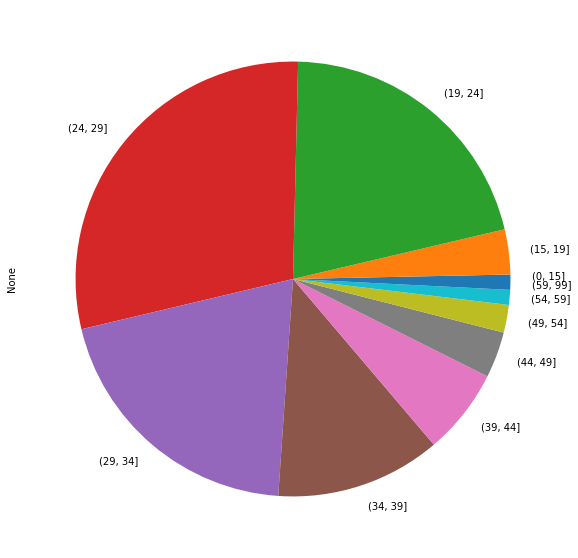

In [16]:
grup_sayıları=survey_19.groupby('AgeInterval').size()
plt.figure(figsize=(10,10))
grup_sayıları.plot(kind="pie")

In [17]:
g=survey_19.groupby('AgeInterval')
interval=list(g.groups.keys())[2]
survey_19[survey_19['AgeInterval']==interval].groupby('SocialMedia').size().idxmax()

'Reddit'

### Soru 3:
* DataFrame'i kariyer memnuniyetine ```(CareerSat)``` göre gruplayıp her bir memnuniyet grubundakilerin yıllık kazanç ```(ConvertedComp)``` ortalamasını bularak çizgi grafiği çiziniz. Çizgi grafiğinde X-ekseni en düşük memnuniyetten en yüksek memnuniyete doğru olmalıdır.

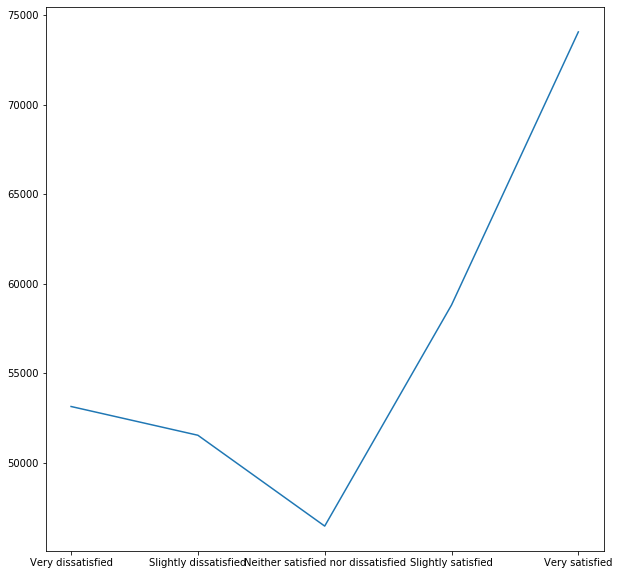

In [19]:
g=survey_19.groupby('CareerSat')
liste=list(g.groups.keys())
ortalamalar=g['ConvertedComp'].mean()
plt.figure(figsize=(10,10))
plt.plot([liste[3],liste[1],liste[0],liste[2],liste[4]],[ortalamalar[3],ortalamalar[1],ortalamalar[0],ortalamalar[2],ortalamalar[4]])

### Soru 4: 
Kadınların daha çok tercih ettiği/edildiği (ankete katılan kadın-erkek oranından daha yüksek orana sahip) geliştirici tipleri ```(DevType)```nelerdir?
* Her bir ```DevType``` tipinin sütun olarak, ankete katılanların da satır olarak temsil edildiği yeni bir DataFrame oluşturup __devtype_df__ adlı değişkene atayın.
* Oluşan __devtype_df__ DataFrame'ine ```Gender``` sütununu ekleyin.
* DataFrame'i cinsiyete göre gruplayarak her bir ```DevType``` için cinsiyete göre sayıları bulun.
* ```DevType``` tiplerindeki kadın-erkek oranlarını, ankete katılan kadın-erkek oranı ile karşılaştırarak kadınların daha çok tercih ettiği/edildiği ```DevType``` tiplerini listeleyin.

In [20]:
devtype_df=survey_19['DevType'].str.get_dummies(sep=';')

In [21]:
devtype_df['Gender']=survey_19['Gender']

In [22]:
devtype_df=survey_19.loc[:,'DevType'].str.get_dummies(sep=';')
devtype_df['Gender']=survey_19['Gender']
devtype_df=devtype_df.groupby(['Gender']).sum()
devtype_df

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator
Gender,,,,,,,,,,,,,,,,,,,,,
Man,4785,5091,5199,8014,7412,7563,5182,34185,14666,6063,...,3695,4792,2409,3484,714,3315,2913,1686,9923,7580
Non-binary,105,94,97,122,154,105,103,453,185,98,...,86,79,55,51,31,56,65,38,189,151
Woman,400,417,447,358,583,241,396,2002,710,252,...,270,296,90,138,87,183,222,59,879,265


In [23]:
oran=survey_19[survey_19['Gender']=='Woman'].shape[0]/survey_19[survey_19['Gender']=='Man'].shape[0]
liste=devtype_df.apply(lambda x: x['Woman']/x['Man']>oran)
print("Kadınların daha çok tercih ettiği/edildiği devtype tipleri: ",list(devtype_df.columns[liste]))

Kadınların daha çok tercih ettiği/edildiği devtype tipleri:  ['Academic researcher', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Developer, front-end', 'Marketing or sales professional', 'Student']


### Soru 5: 
Ankete katılım sayısı bakımından ilk ve son 10 ülkeyi tek bir figürde yan yana iki ayrı alt grafik (subplot) olacak şekilde pasta grafiği ile gösteriniz.

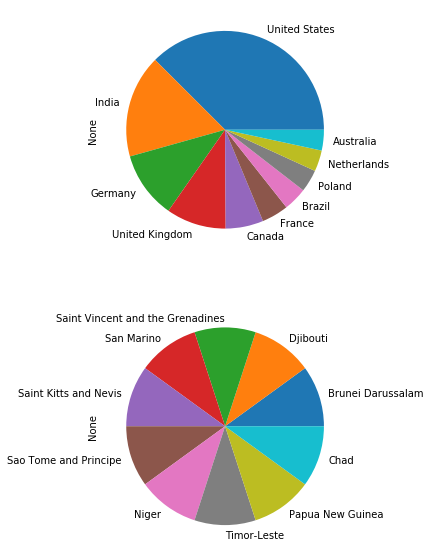

In [27]:
ilk10=survey_19.groupby('Country').size().sort_values(ascending=False)[:10]
son10=survey_19.groupby('Country').size().sort_values(ascending=True)[:10]
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ilk10.plot.pie(ax=axes[0])
son10.plot.pie(ax=axes[1])

### Soru 6: 
Veri Bilimcilerin (```DevType``` sütununda ```Data scientist or machine learning specialist``` değerini içeren) en çok kullandığı dil ```(LanguageWorkedWith)``` nedir? Tüm kullandıkları dillerin yüzdelerini bulunuz ve yatay bar plot olarak gösteriniz.

En çok kullanılan dil:  Python


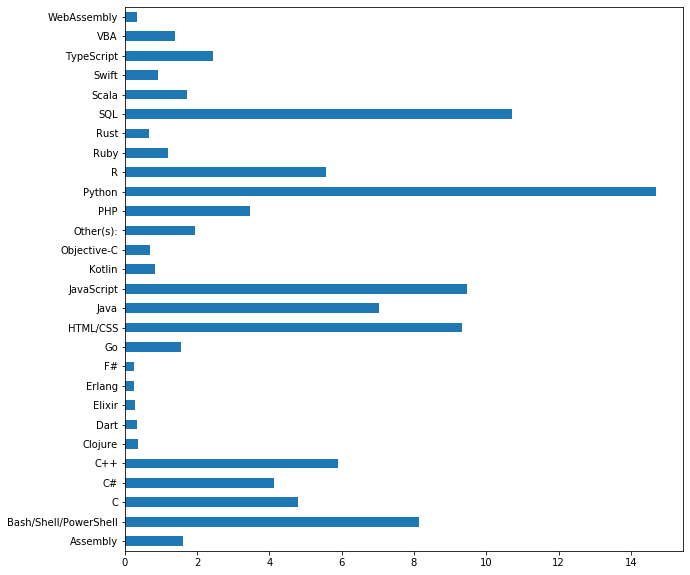

In [33]:
değerler=survey_19[survey_19['DevType'].str.contains('Data scientist or machine learning specialist')]['LanguageWorkedWith'].str.get_dummies(sep=';')
toplam=değerler.sum()
print("En çok kullanılan dil: ",toplam.idxmax())
top_toplam=toplam.sum()
yüzdeler=toplam.apply(lambda x: (x/top_toplam)*100)
plt.figure(figsize=(10,10))
yüzdeler.plot(kind='barh')

### Soru 7:
* Haftalık çalışma saatlerinin ```(WorkWeekHrs)``` ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturunuz.
* Ortalamaya göre büyükten küçüğe sıralayınız. 
* Türkiye'nin kaçıncı sırada olduğunu ve haftalık çalışma saatini bulunuz.

In [34]:
a=survey_19.groupby('Country')['WorkWeekHrs'].agg(['mean' ,  'std'  , 'median'])
a

,mean,std,median
Country,,,
Afghanistan,43.272727,7.630084,45.0
Albania,40.123077,11.061628,40.0
Algeria,34.934211,11.506855,40.0
Andorra,42.000000,2.828427,42.0
Angola,45.000000,NaN,45.0
...,...,...,...
"Venezuela, Bolivarian Republic of...",34.476190,11.012716,40.0
Viet Nam,40.906863,8.370366,40.0
Yemen,38.833333,21.169947,40.0


In [35]:
a.sort_values(by=['mean'] ,ascending=False,inplace=True)
a

,mean,std,median
Country,,,
Burundi,60.000000,14.142136,60.0
Mali,57.500000,17.677670,57.5
Turkmenistan,52.333333,11.676187,50.0
Liechtenstein,50.000000,NaN,50.0
Seychelles,50.000000,NaN,50.0
...,...,...,...
Namibia,NaN,NaN,NaN
Niger,NaN,NaN,NaN
Papua New Guinea,NaN,NaN,NaN


In [39]:
print("Türkiyenin haftalık çalışma saati ortalaması: ",a[a.index=='Turkey']['mean'][0])
print("Türkiye'nin sırası: ",a.index.get_loc('Turkey')+1)

Türkiyenin haftalık çalışma saati ortalaması:  41.055263157894736
Türkiye'nin sırası:  41


### Soru 8:
Ankete katılanların ortalama haftada kaç saat kod incelediği bilgisini ```(CodeRevHrs)``` kullanarak 40 saatten az kod inceleyenler ile bir histogram (bins=20) çiziniz.


(array([5.4650e+03, 1.4241e+04, 1.4191e+04, 2.6250e+03, 2.6270e+03,
        3.5990e+03, 4.2400e+02, 8.4100e+02, 1.2100e+02, 3.3000e+01,
        5.5800e+02, 5.0000e+00, 1.3500e+02, 3.0000e+00, 7.0000e+00,
        1.0400e+02, 4.0000e+00, 2.1000e+01, 6.0000e+00, 2.0000e+00]),
 array([ 0.  ,  1.95,  3.9 ,  5.85,  7.8 ,  9.75, 11.7 , 13.65, 15.6 ,
        17.55, 19.5 , 21.45, 23.4 , 25.35, 27.3 , 29.25, 31.2 , 33.15,
        35.1 , 37.05, 39.  ]),
 <a list of 20 Patch objects>)

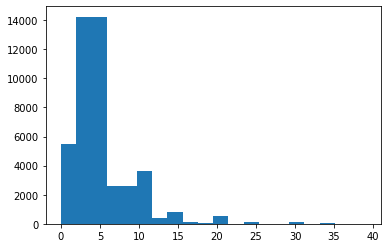

In [40]:
liste=survey_19[survey_19['CodeRevHrs']<40]['CodeRevHrs']
plt.hist(liste,bins=20)

### Soru 9:
* ```MainBranch``` sütununda bulunan değerleri aşağıdaki değerler ile değiştirin.

    ``` {'I am a student who is learning to code': 'Student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
    'I am a developer by profession':  'Developer',
    'I code primarily as a hobby':   'Code as hobby',
    'I used to be a developer by profession, but no longer am': 'Was a Developer'} 
    ```
* Ana branş ```(MainBranch)``` X-ekseninde olacak şekilde her bir branştakilerin sayısını bar plot ile gösteriniz. Her bir bar, Cinsiyet ```(Gender)``` sayısına göre yığıt (stacked) şeklinde gösterilmelidir. 
* Ana branşı ```Developer``` olan ve Türkiye'den ankete katılanların eğitim seviyelerine göre dağılımını pasta grafiği ile gösteriniz.

In [41]:
dict={'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
'I am a developer by profession':  'Developer',
'I code primarily as a hobby':   'Code as hobby',
'I used to be a developer by profession, but no longer am': 'Was a Developer'}
survey_19["MainBranch"].replace(dict, inplace=True)

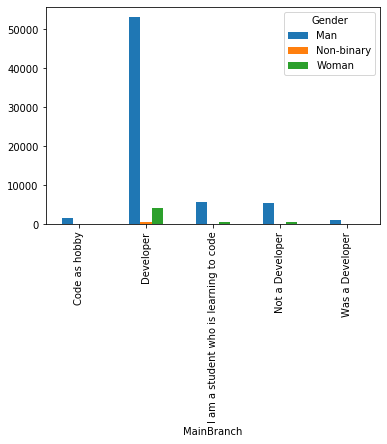

In [109]:
survey_19.groupby(["MainBranch",'Gender']).size().unstack().plot(kind="bar")


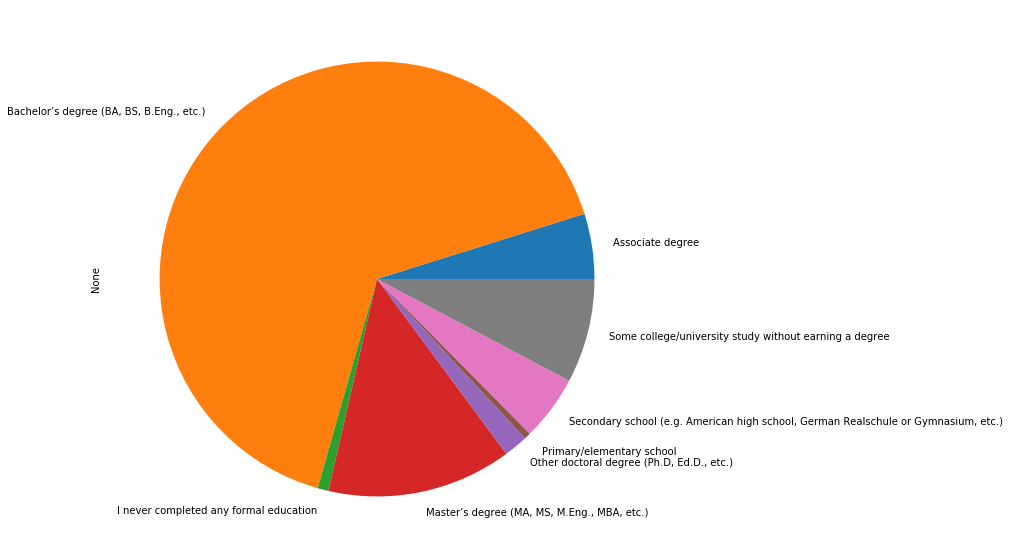

In [366]:
plt.figure(figsize=(10,10))
survey_19[(survey_19['MainBranch']=='Developer') & (survey_19['Country']=='Turkey')].groupby('EdLevel').size().plot(kind="pie")

### Soru 10:
Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşını bulunuz. 
* ```CurrencySymbol, CompTotal ve CompFreq``` sütunlarını kullanın.
* Her üç sütundan herhangi biri NaN olan satırları ihmal ediniz. 
* Frekansı ```(CompFreq)``` haftalık olanlar için bir yılı 50 hafta, aylık olanlar için ise 12 ay olarak düşününüz.

In [43]:
df=survey_19[(survey_19['Country']=='Turkey') & (survey_19['CurrencySymbol']=='TRY')].loc[:,['CompTotal','CompFreq']].dropna()
haftalıklar=df[df['CompFreq']=='Weekly']['CompTotal']*50
aylıklar=df[df['CompFreq']=='Monthly']['CompTotal']*12
yıllıklar=df[df['CompFreq']=='Yearly']['CompTotal']
print("Yıllık maaş ortalaması: ",(haftalıklar.sum()+aylıklar.sum()+yıllıklar.sum())/df.shape[0]," TRY")

Yıllık maaş ortalaması:  107754.0396475771  TRY


### Soru 11:
Her bir işletim sistemi ```(OpSys)``` için,  açık kaynağa katkı verme sıklıklarına ```(OpenSourcer)``` göre anketör sayılarını bar grafik ile gösteriniz.

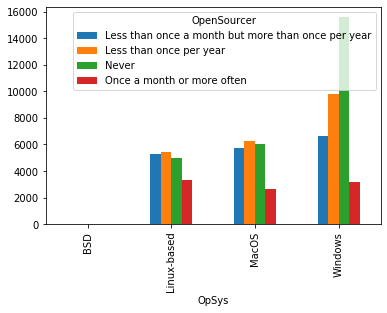

In [45]:
survey_19.groupby(['OpSys','OpenSourcer']).size().unstack().plot(kind="bar")

### Soru 12:
* Ülkelerdeki eğitim düzeyi ```(EdLevel)``` oranlarını içeren __country_edlevels__ adında bir dataframe oluşturunuz. (Satır ülkeler, sütun eğitim düzeyleri olacak şekilde)
* Ankete en çok katılım gösteren 5 ülkeyi, her bir eğitim düzeyi oranı için karşılaştırmalı olarak gösteren bir bar plot çiziniz.

In [85]:
country_edlevels=survey_19['EdLevel'].str.get_dummies()
country_edlevels['Country']=survey_19['Country']
country_edlevels=country_edlevels.groupby(['Country']).sum()
country_edlevels

,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I never completed any formal education,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree
Country,,,,,,,,,
Afghanistan,3,16,1,0,0,1,0,3,1
Albania,0,35,0,24,0,1,1,5,11
Algeria,0,25,1,50,1,2,2,2,13
Andorra,0,0,2,0,0,1,0,1,1
Angola,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",2,24,0,6,1,0,7,6,21
Viet Nam,12,87,10,21,3,5,2,19,22
Yemen,0,10,0,1,0,0,0,0,3


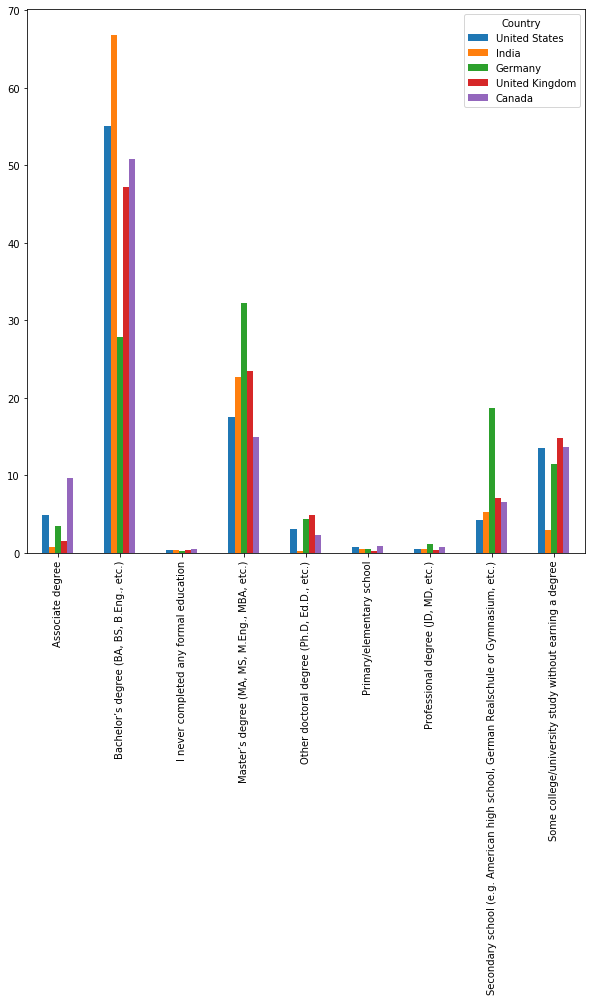

In [86]:
toplamlar=country_edlevels.sum(axis=1).sort_values(ascending=False)[:5]
ülkeler=toplamlar.index
country_edlevels.loc[ülkeler,:].apply(lambda x: (x/toplamlar)*100).transpose().plot(kind="bar",figsize=(10,10))

### Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```Country, Continent, CurrencyCode``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak 
    * ```NA``` filtreleme yapmadan (```North America``` kıtasının kısaltması olan ```NA```'yı ```NaN``` değer olarak okumamak için)
  
  okuyarak __country_info__ adlı DataFrame'e aktarınız.
  
  
*     

           {AF : Africa
            AS : Asia			
            EU : Europe			
            NA : North America		
            OC : Oceania			
            SA : South America		
            AN : Antarctica	} 

   yukarıdaki haritalamayı kullanarak kıta isimlerini içeren ```ContinentName``` isimli yeni bir sütun oluşturunuz.

In [52]:
country_info=pd.read_csv(r"file.txt",skiprows=49,sep="\t",na_filter=False)
country_info=country_info.loc[:,['Country', 'Continent', 'CurrencyCode'] ]
country_info.index=country_info['Country']
country_info.drop('Country',axis=1,inplace=True)

,Continent,CurrencyCode
Country,,
Andorra,EU,EUR
United Arab Emirates,AS,AED
Afghanistan,AS,AFN
Antigua and Barbuda,NA,XCD
Anguilla,NA,XCD
...,...,...
South Africa,AF,ZAR
Zambia,AF,ZMW
Zimbabwe,AF,ZWL


In [77]:
dictinory={"AF" : "Africa",
        "AS" : "Asia",			
        "EU" : "Europe",			
        "NA" : "North America",		
        "OC" : "Oceania",			
        "SA" : "South America",		
        "AN" : "Antarctica"	}
country_info['ContinentName']=country_info['Continent']
country_info['ContinentName'].replace(dictinory,inplace=True)
country_info

,Continent,CurrencyCode,ContinentName
Country,,,
Andorra,EU,EUR,Europe
United Arab Emirates,AS,AED,Asia
Afghanistan,AS,AFN,Asia
Antigua and Barbuda,NA,XCD,North America
Anguilla,NA,XCD,North America
...,...,...,...
South Africa,AF,ZAR,Africa
Zambia,AF,ZMW,Africa
Zimbabwe,AF,ZWL,Africa


### Soru 14:

* __survey_19__ dataframe'i ile __country_info__ dataframe'ini ülke bazında birleştirip __merged_survey__ isimli yeni bir dataframe'e aktarınız.
* Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı nedir?
* Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleyiniz.
* Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleyiniz.
* Avrupa kıtasındaki ülkelerin ortalama haftalık çalışma saati ```(WorkWeekHrs)``` ve ortalama yıllık maaşlarını ```(ConvertedComp)``` saçılım (scatter) grafiğinde gösteriniz.

In [87]:
merged_survey=survey_19.merge(country_info,on='Country')

In [88]:
print("Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı: ",
merged_survey[merged_survey['CurrencySymbol']!=merged_survey['CurrencyCode']].shape[0])

Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı:  13322


In [90]:
merged_survey.groupby(['CurrencySymbol'])['Country'].value_counts().unstack().count(axis=1).sort_values(ascending=False)

CurrencySymbol
USD    113
EUR     77
GBP     38
AED     27
AUD     20
      ... 
JOD      1
TMT      1
TJS      1
KHR      1
KGS      1
Length: 132, dtype: int64

In [104]:
ax=merged_survey.groupby(['ContinentName','Country'])['ConvertedComp'].agg('mean').unstack()
ax.idxmax(axis=1)
ax.max(axis=1)


ContinentName
Africa           Democratic Republic of the Congo
Asia                                       Israel
Europe                                    Andorra
North America                       United States
Oceania                                 Australia
South America                             Uruguay
dtype: object

C:\Users\fatih\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


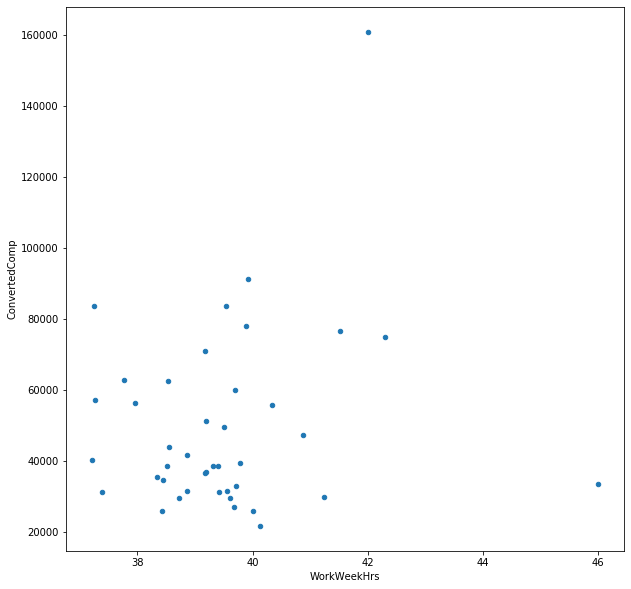

In [103]:
ortalamalar=merged_survey[merged_survey['Continent']=='EU'].groupby('Country')['WorkWeekHrs','ConvertedComp'].agg('mean')
ortalamalar.plot.scatter(x='WorkWeekHrs',y='ConvertedComp',figsize=(10,10))